In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import colors
from sklearn.cluster import KMeans

cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['sepal_length'] = df['sepal length (cm)']
df['sepal_width'] = df['sepal width (cm)']
df = df[['sepal_length', 'sepal_width']]
variety = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, variety, test_size=0.25)

In [5]:
lda = LinearDiscriminantAnalysis()

In [6]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [7]:
lda.predict(X_test)
accuracy_score(y_test, lda.predict(X_test))

0.8421052631578947

In [8]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [9]:
lda.coef_

array([[-6.18783976,  8.02005834],
       [ 1.92308349, -3.94167027],
       [ 4.05108033, -3.64042472]])

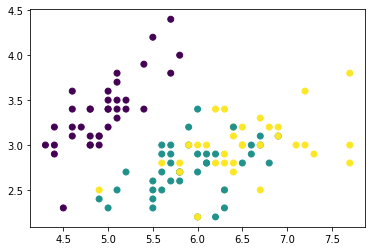

In [10]:
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
plt.show()

In [11]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal_length', 'sepal_width']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal_length', 'sepal_width']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

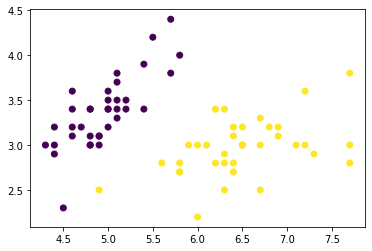

In [12]:
plt.scatter(small_train['sepal_length'], small_train['sepal_width'], c=sy_train)
plt.show()

In [13]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [14]:
lda_small.means_

array([[4.95      , 3.37222222],
       [6.49166667, 2.96944444]])

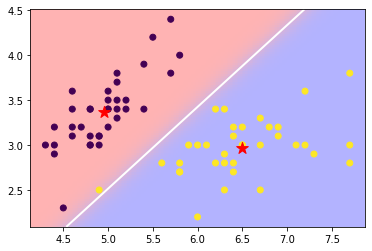

In [15]:
plt.scatter(small_train['sepal_length'], small_train['sepal_width'], c=sy_train)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [16]:
lda_small.coef_

array([[ 10.68607463, -11.74257053]])

In [17]:
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

## Кластеризация

In [18]:
X = df[['sepal_length', 'sepal_width']] 

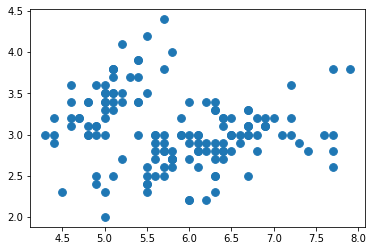

In [19]:
plt.scatter(X['sepal_length'], X['sepal_width'], s=60)

In [20]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

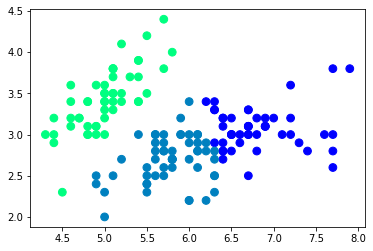

In [21]:
plt.scatter(X['sepal_length'], X['sepal_width'], cmap='winter', c=clusters, s=60)

In [22]:
k_inertia = []
ks = range(1, 20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X)
    k_inertia.append(clf_kmeans.inertia_)

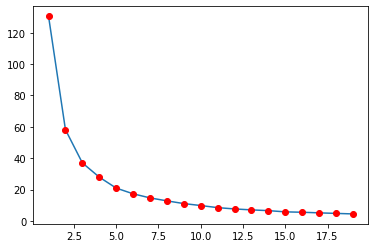

In [23]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

## Вывод

Для определения целевой переменной мы оставили только два признака из четырех, поэтому коэффициент точности предсказаний ниже (0,68-0,85 в разных итерациях), чем если бы мы сделали прогноз на основании всех признаков (в последнем случае может достигать 1).

Из графиков классов и с центрами классов видно, что первый класс ирисов Setosa заметно дифференцируется от двух остальных. Дифференциация внутри Versicolor и Virginica более затруднительна — дискриминантный и кластерный анализ для них дают разные результаты. Неудивительно, почему большее число ошибок присутствует при определении класслов 1 и 2; для класса 0 алгоритм почти не ошибается. Роль признаков в определении классов различается: большее значение имеет признак sepal_lenght, чем sepal_width. Но при этом оба признака важны.    

Кластерный анализ показал, что эвристически оптимальным числом кластеров является 3-5.          